### Jupyter notebook

A Python development environment


Installation guide: https://jupyter.org/install


### Essential ML libraries:

* scikit-learn
* pandas
* matplotlib
* numpy

Data for ML projects usually present in the form of tabular data and manipulated via Pandas dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold 

%matplotlib inline

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
root = '/Users/schwalmdaniel/github/kaggle/titanic'
#root = 'd:/dev/python/kaggle/titanic'

train=pd.read_csv(root + "/train.csv")

### Explotatory Data Analysis

In [3]:
# first let's see what is the shape of the data (cols, rows)

train.shape

(891, 12)

In [4]:
# what are the data types of the columns. Note that data types are inferred from the data and use 'fat' data types.

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# finally let's have a look at the data itself

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# we want to predict whether a given person survived the disaster or not

train['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

**Accuracy**: Percentage of correct predictions made by the model


The **Null Accuracy** for this prediction is 61%.

This means that by always predicting 'not survived' we can achieve the same accuracy without creating any models.
We have to be better than this.

In [7]:
# missing data seriously impacts models, let us check what data is missing

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# for now drop Cabin due to lot of missing data

train = train.drop(['Cabin'],axis=1)

In [9]:
# check the Age feature
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
# let us fill the missing Age data with random values between the mean +- standard deviation

mean = train["Age"].mean()
std = train["Age"].std()
    
train['Age'] = train['Age'].apply(lambda x: np.random.randint(mean - std, mean + std) if np.isnan(x) else x)

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
# check the Embarked field. Note how the describe() output looks for object or numeric types

train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [12]:
# convert the columns to be string

train['Embarked'].fillna('',inplace=True)
train['Embarked'] = train['Embarked'].astype(str)

# fill the missing data with the most frequent value in this case

train['Embarked'] = train['Embarked'].apply(lambda x: 'S' if not x or not x.strip() else x)

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
# We dealt with missing data now.

# Machines only understand numeric data so we have to convert all columns to numeric


# we can do it manually
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)


# or with One Hot Encoding for categorical variables
train = pd.get_dummies(train, columns = ['Embarked','Parch'], prefix_sep='__')


In [15]:
# Passenger id does not hold any information for training, let's drop it
# Also, drop Name and Ticket information for now, they may carry meaningful information though

train = train.drop(['PassengerId','Name', 'Ticket'], axis=1)

In [16]:
# Now we have only numeric data we are ready for training

train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked__C,Embarked__Q,Embarked__S,Parch__0,Parch__1,Parch__2,Parch__3,Parch__4,Parch__5,Parch__6
0,0,3,1,22.0,1,7.2500,0,0,1,1,0,0,0,0,0,0
1,1,1,0,38.0,1,71.2833,1,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,7.9250,0,0,1,1,0,0,0,0,0,0
3,1,1,0,35.0,1,53.1000,0,0,1,1,0,0,0,0,0,0
4,0,3,1,35.0,0,8.0500,0,0,1,1,0,0,0,0,0,0
5,0,3,1,28.0,0,8.4583,0,1,0,1,0,0,0,0,0,0
6,0,1,1,54.0,0,51.8625,0,0,1,1,0,0,0,0,0,0
7,0,3,1,2.0,3,21.0750,0,0,1,0,1,0,0,0,0,0
8,1,3,0,27.0,0,11.1333,0,0,1,0,0,1,0,0,0,0
9,1,2,0,14.0,1,30.0708,1,0,0,1,0,0,0,0,0,0


In [17]:
# Our dataset is composed of a target variable (e.g. label) and a lot of features. 
# Usually with 'X' they refer to the features and with 'y' the target variable
# Let us split our training set according to this

X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [18]:
# let's start to train the model by splitting the training set to training and validation set
# this way we can check how accurate is our model for previously unseen data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [19]:
print ('Training shape: %s, test shape: %s' % (X_train.shape, X_test.shape))

Training shape: (712, 15), test shape: (179, 15)


In [48]:
# let us pick the four most frequent models in their naive form, e.g. without any fine tuning 
# run it multiple times and see what happens

lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

for model in [lr, knn, d_tree, forest]:
    model.fit(X_train, y_train)
    model.predict(X_test)
    print ('%s accuracy score: %f' % (model.__class__.__name__, model.score(X_test, y_test)))
    

LogisticRegression accuracy score: 0.782123
KNeighborsClassifier accuracy score: 0.681564
DecisionTreeClassifier accuracy score: 0.765363
RandomForestClassifier accuracy score: 0.798883


In [59]:
# the accuracy was not bad but there was a variance in the accuracy scores
# to get a glimpse on the average accuracy let us do a K-Fold cross validation
# K-Fold mean

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=37)

for model in [lr, knn, d_tree, forest]:
       
    auc_buf = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model.fit(X_train, y_train)
        model.predict(X_test)
        
        auc_buf.append(model.score(X_test, y_test))
        
    print ('%s mean accuracy score: %f' % (model.__class__.__name__, np.mean(auc_buf))) 
    

LogisticRegression mean accuracy score: 0.795719
KNeighborsClassifier mean accuracy score: 0.681244
DecisionTreeClassifier mean accuracy score: 0.780058
RandomForestClassifier mean accuracy score: 0.782286


RandomForestClassifier mean accuracy score: 0.787892


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


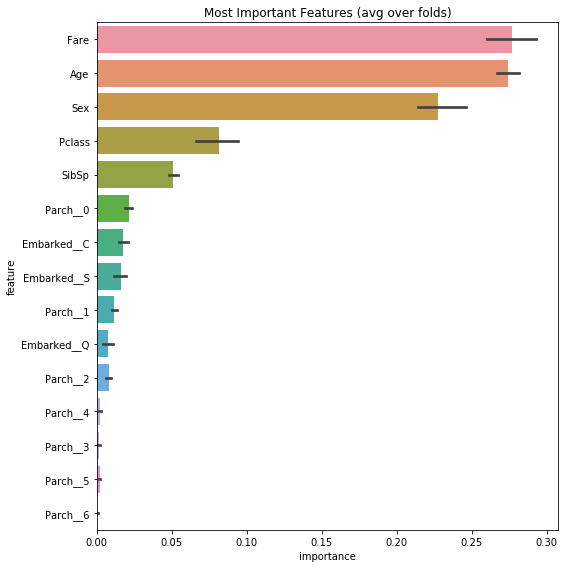

In [60]:
# let's pick the random forest classifier as our best model
# and visualize our results
# run this multiple times to see the randomness of the model

model_features = list(X.columns)
feature_importance_df = pd.DataFrame()


#print (str(len(X.index)))

for model in [forest]:
       
    auc_buf = []

    for fold_, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        conf_mat = confusion_matrix(y_test, predictions)
        #print(conf_mat)
        #print(str(len(X_train.index)))
        #print(str(len(X_test.index)))
        
        auc_buf.append(model.score(X_test, y_test))
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = model_features
        fold_importance_df["importance"] = model.feature_importances_
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        
    print ('%s mean accuracy score: %f' % (model.__class__.__name__, np.mean(auc_buf))) 
    
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(8,8))
sns.barplot(x="importance",y="feature",data=best_features.sort_values(by="importance", ascending=False))
plt.title('Most Important Features (avg over folds)')
plt.tight_layout()



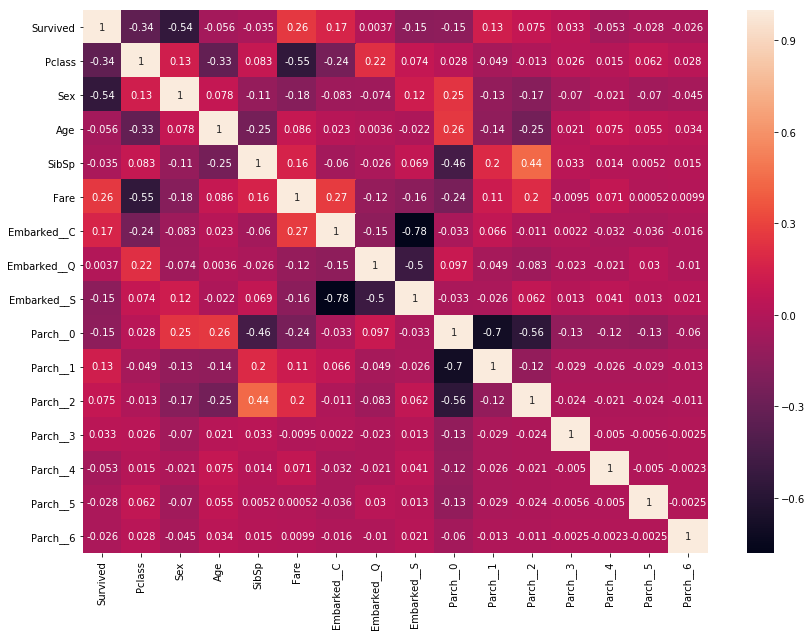

In [61]:
# print the correlation matrix

plt.figure(figsize=(14,10))
sns.heatmap(train.corr(),annot=True)

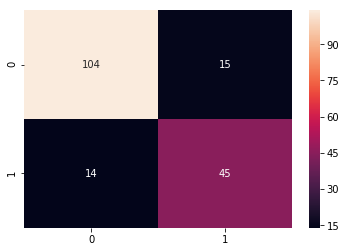

In [62]:
# print the confusion matrix for the last prediction

conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt=".0f")
plt.show()